<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#CA6F1E;
            overflow:hidden;
            font-weight:700"><span style='color:#283747'></span>"Predict behavior to retain customers." </div>

> * Information **DATA**
> https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

- [1. Exploratory Data Anlysis(EDA)](#a)
    - [1.1 Load The Datset](#1.1)
    - [1.2 Data Description](#1.2)
    - [1.3 Data Cleaning](#1.3)
        - [1.3.1 Missing Value](#1.3.1)
        - [1.3.2 Duplicated](#1.3.2)
        - [1.3.3 Outliter](#1.3.3)
- [2.Dianostics Analytics and Data Visualization](#2)
    - [2.1 Gender, Seniority, Partner and Pependends](#2.1)
    - [2.2 Services](#2.2)
    - [2.3 Security_support](#2.3)
    - [2.4 Contract type](#2.4)
    - [2.5 Churn analysis based on paying options](#2.5)
    - [2.6 Churn analysis based on tenure group](#2.6)
    - [2.7 Charges](#2.7)
- [3. Data preprocessing and feature engineering](#4)
    - [3.1 Min-Max Scaling or Standardization?](#4.1)
    - [3.2 Encoding Categorical Variables](#4.2)
        - [3.2.1 Label Encoding](#4.2.1)
        - [3.2.2 One hot Encoding](#4.2.2)
        - [3.2.3 Multicolinearity](#4.2.3)
- [4. Data Splitting and Model Building](#5)
   - [4.1 Data Splitting](#5.1)
   - [4.2 Model Buiding](#5.2)
       - [4.2.1 Feature selection](#5.2.1)
           <!-- - [4.2.1.1 Recursive Feature Elimination (RFE)](#5.2.1.1)
           - [4.2.1.2 Model building using L1 Regularization](#5.2.1.2) -->
       - [4.2.2 Feature importance](#5.2.2)
- [5. Model Evaluation](#6) 


<a id="a"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span>Exploring The Dataset</div>

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt # Operation and Visualization
import statsmodels.api as sm 

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
### check multicorre
from statsmodels.stats.outliers_influence import variance_inflation_factor
## Feature selection
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder 

import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
# Display all the column of the dataframes
pd.set_option('display.max_columns', None)

<a id="1.1"></a>
## <b>1.1 <span style='color:#00008B'>Load The dataset</span></b>

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ManonYa09/Statistics_with_Python_G6/main/Dataset/4.%20WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df[df['tenure']==0]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753           Yes                No              No  No internet service   
936           Yes                No             DSL                  Yes   
1082          Yes               Yes              No  No internet service   
1340           No  No phone service             DSL                  Yes   
3331          Yes                No              No  No internet service   
3826          Yes               Yes              No  No internet service   
4380          Yes                No              No  No internet service   
5218          Yes                No              No  No internet service   
6670          Yes               Yes             DSL                   No   
6754          Yes               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85             

<a id="1.2"></a>
## <b>1.2 <span style='color:#00008B'>Data Description</span></b>

In [6]:
df.drop(columns='customerID', inplace=True)

In [7]:
df.shape

(7043, 20)

<a id="1.3"></a>
## <b>1.3 <span style='color:#00008B'>Data Cleaning</span></b>


<a id="1.3.1"></a>
### <b>1.3.1 <span style='color:#00008B'>Missing Value</span></b>


In [8]:
df.drop(index = df[df['TotalCharges']==' '].index, inplace=True)

In [15]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [14]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [16]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [12]:
# categoric_columns = []
# yes_no_columns = []
# numeric_columns = []

# def categorize_columns(dataset):
#     columns = list(dataset.columns)
    
#     for i in columns:
#         if len(dataset[i].unique()) > 6:
#             numeric_columns.append(i)
#         elif len(dataset[i].unique()) == 2:
#             yes_no_columns.append(i)
#         else:
#             categoric_columns.append(i)
#     return categoric_columns, yes_no_columns, numeric_columns

In [ ]:
# categorize_columns(df)

In [13]:
 # df[categoric_columns]

In [ ]:
## Deal tunure 0 use interpolation
sns.histplot(data = df, x='tenure', kde=True)
plt.show()

In [ ]:
df.isnull().sum()

<a id="1.3.2"></a>
### <b>1.3.2 <span style='color:#00008B'>Duplicated</span></b>


In [17]:
df.duplicated().sum()

22

In [18]:
df[df.duplicated()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
964     Male              0      No         No       1          Yes   
1338    Male              0      No         No       1          Yes   
1491  Female              0      No         No       1          Yes   
1739    Male              0      No         No       1          Yes   
1932    Male              0      No         No       1          Yes   
2713    Male              0      No         No       1          Yes   
2892    Male              0      No         No       1          Yes   
3301  Female              1      No         No       1          Yes   
3754    Male              0      No         No       1          Yes   
4098    Male              0      No         No       1          Yes   
4476  Female              0      No         No       1          Yes   
5506    Male              0      No         No       1          Yes   
5736    Male              0      No         No       1          Yes   
5759  Female              0      No         No       1          Yes   
6267  Female              0      No         No       1          Yes   
6499    Male              0      No         No       1          Yes   
6518    Male              0      No         No       1          Yes   
6609    Male              0      No         No       1          Yes   
6706  Female              0      No         No       1          Yes   
6764  Female              0      No         No       1          Yes   
6774  Female              0      No         No       1          Yes   
6924    Male              0      No         No       1          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
964             No             DSL                   No                   No   
1338            No              No  No internet service  No internet service   
1491            No              No  No internet service  No internet service   
1739            No     Fiber optic                   No                   No   
1932            No              No  No internet service  No internet service   
2713            No              No  No internet service  No internet service   
2892            No              No  No internet service  No internet service   
3301            No     Fiber optic                   No                   No   
3754            No              No  No internet service  No internet service   
4098            No              No  No internet service  No internet service   
4476            No              No  No internet service  No internet service   
5506            No              No  No internet service  No internet service   
5736            No              No  No internet service  No internet service   
5759            No     Fiber optic                   No                   No   
6267            No     Fiber optic                   No                   No   
6499            No              No  No internet service  No internet service   
6518            No             DSL                   No                   No   
6609            No              No  No internet service  No internet service   
6706            No              No  No internet service  No internet service   
6764            No     Fiber optic                   No                   No   
6774            No              No  No internet service  No internet service   
6924            No     Fiber optic                   No                   No   

         DeviceProtection          TechSupport          StreamingTV  \
964                    No                   No                   No   
1338  No internet service  No internet service  No internet service   
1491  No internet service  No internet service  No internet service   
1739                   No                   No                   No   
1932  No internet service  No internet service  No internet service   
2713  No internet service  No internet service  No internet service   
2892  No internet service  No inte

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df[df.duplicated()]

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

<a id="1.3.3"></a>
### <b>1.3.3 <span style='color:#00008B'>Outlier</span></b>

<Axes: >

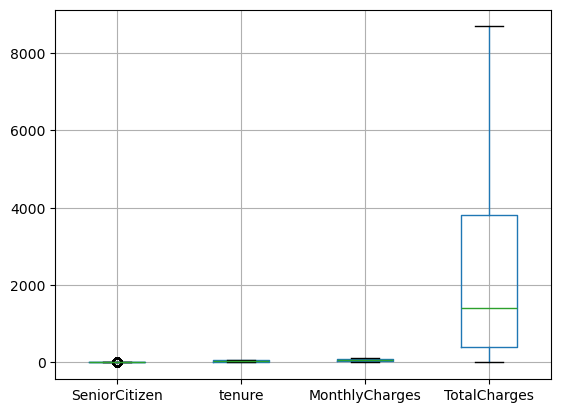

In [21]:
df.boxplot()

<a id="2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">2 <span style='color:#CDA63A'>|</span>Diagnostics Analytics with Data Visualization</div>

In [22]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:blue;
            overflow:hidden;
            font-weight:700">Now, let's understand dataset based on:</div>


#### Gender, Senoirity, Parnter and Dependents
#### Services
#### Security_support
#### Contract type
#### Churn 
#### Charges

<a id="2.1"></a>
# <b>2.1 <span style='color:#00008B'>Gender, Seniority, Partner and Dependends(Customer)</span></b>

In [23]:
df['Churn'].value_counts()

Churn
No     5153
Yes    1857
Name: count, dtype: int64

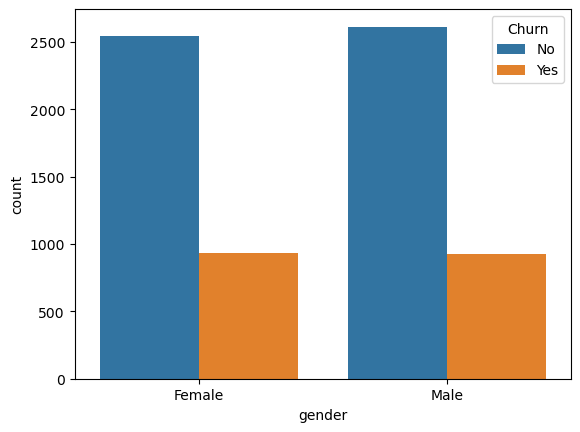

In [25]:
sns.countplot(x = df['gender'], hue = df['Churn']);

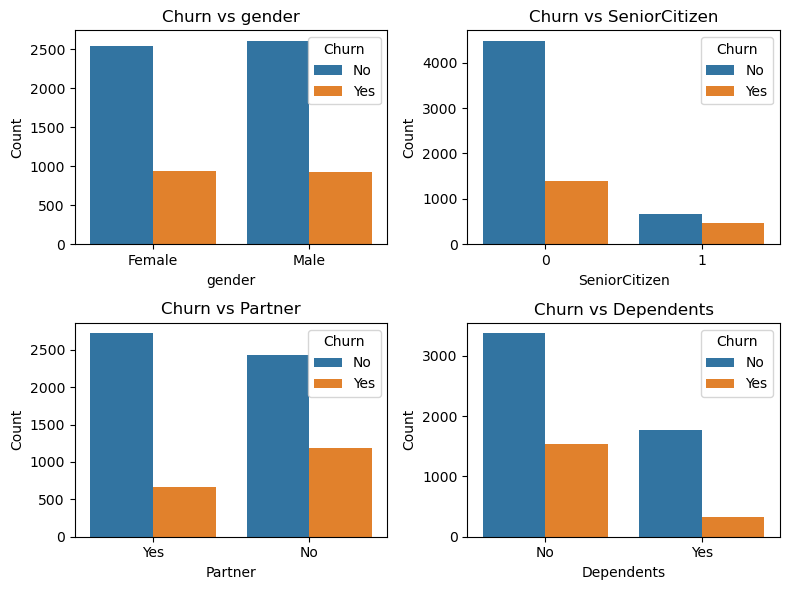

In [26]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))  # Creating a 2x2 grid of plots

# Accessing each subplot using direct indexing
sns.countplot(data=df, x=cols[0], hue='Churn', ax=axes[0, 0])
axes[0, 0].set_title(f'Churn vs {cols[0]}')
axes[0, 0].set_xlabel(cols[0])
axes[0, 0].set_ylabel('Count')

sns.countplot(data=df, x=cols[1], hue='Churn', ax=axes[0, 1])
axes[0, 1].set_title(f'Churn vs {cols[1]}')
axes[0, 1].set_xlabel(cols[1])
axes[0, 1].set_ylabel('Count')

sns.countplot(data=df, x=cols[2], hue='Churn', ax=axes[1, 0])
axes[1, 0].set_title(f'Churn vs {cols[2]}')
axes[1, 0].set_xlabel(cols[2])
axes[1, 0].set_ylabel('Count')

sns.countplot(data=df, x=cols[3], hue='Churn', ax=axes[1, 1])
axes[1, 1].set_title(f'Churn vs {cols[3]}')
axes[1, 1].set_xlabel(cols[3])
axes[1, 1].set_ylabel('Count')
plt.tight_layout()

[enumerate(axes.flat)](https://www.tutorialspoint.com/what-does-axes-flat-in-matplotlib-do)

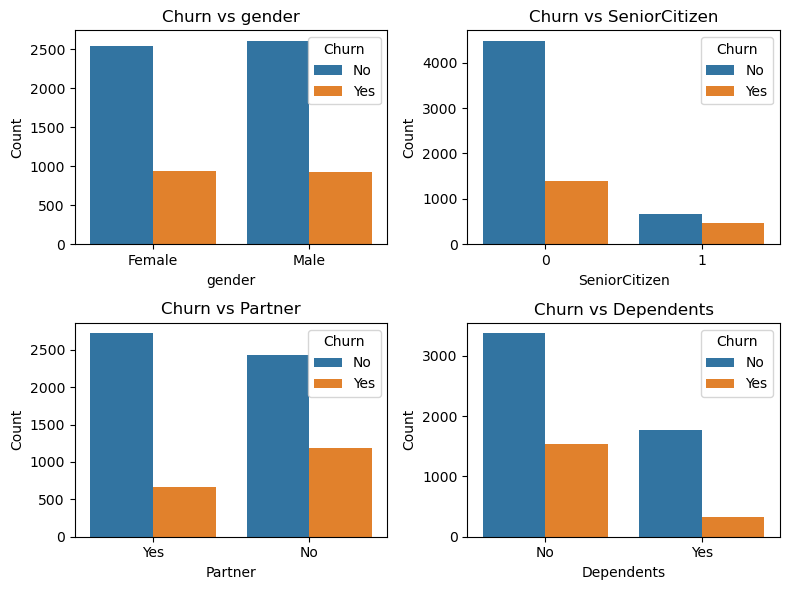

In [28]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6)) # 2x2 grid of plot

for i, ax in enumerate(axes.flat): # enumerate function is used to loop through each subplot in the grid
    if i < len(cols):
        sns.countplot(data=df, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        
plt.tight_layout() # ensuring that each plot is evenly spaced within the figure
plt.show()

- **Gender** has **no influence** on whether the customer will churn or not. 
- **seniorcitizens**  **churn more** than non-senior in **absolute term** but in **relative term senior citizens churn more** often.
- **Customers without partner churn more** often than their counterparts.<br>
and finally, 
- **customers without dependants churn more** than customers with dependents.


<a id="2.2"></a>
# <b>2.2 <span style='color:#00008B'>Services</span></b>


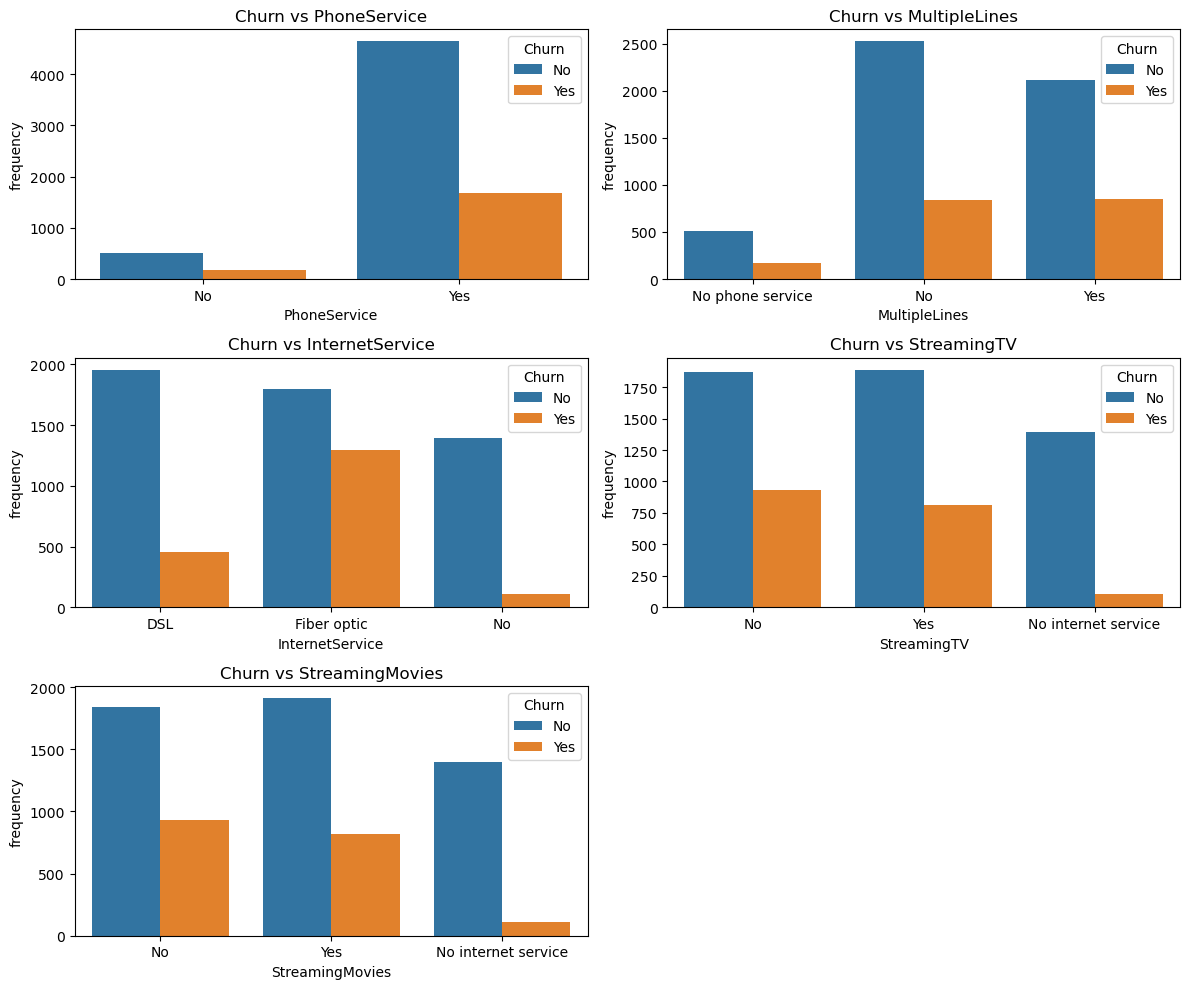

In [31]:
services = df[['Churn', 'PhoneService', 'MultipleLines', 'InternetService','StreamingTV', 'StreamingMovies']]
cols = services.columns[1:]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,10))

for i, ax in enumerate(axes.flat):
        
    if i < len(cols):
        sns.countplot(data=services, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('frequency')
    else:
        ax.set_visible(False)
plt.tight_layout()
plt.show()


In [35]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3090
DSL            2414
No             1506
Name: count, dtype: int64

- Streaming TV, Streaming Movies, Multiple Lines have **no impact** on churn rate.
- Customers who have **fiber optic** tend to **churn** significantly more than ones that have DSL.

Now let's dive deeper into that finding.
We need gender, partner status, dependents status and senior status.

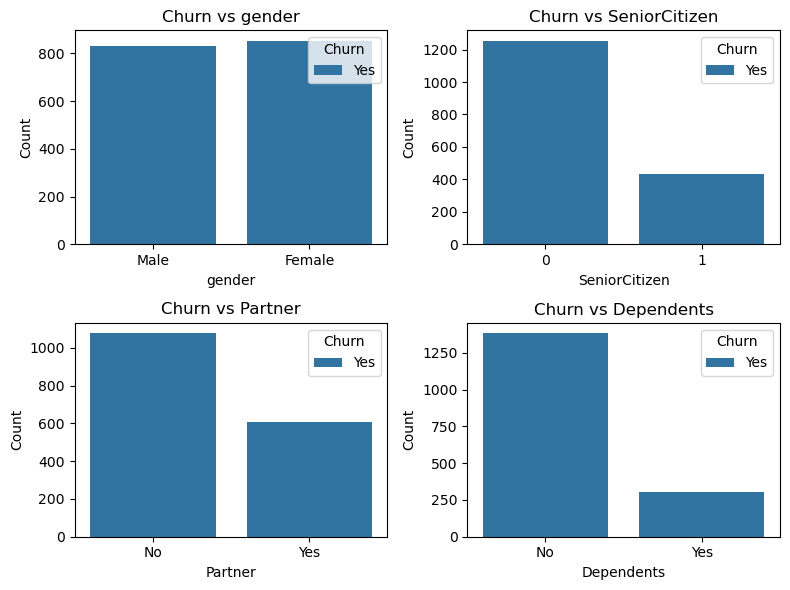

In [32]:
phone_churn = df[(df['PhoneService']=='Yes') & (df['Churn']=='Yes')]

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=phone_churn, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

We can conclude that customers who have churned and use phone service are likely to be **non-seniors, without partners and dependents.** We had got the same conclusion when analyzing the same variables regardless of customers' services.

Now let's investigate the customers who have fiber optic and who have churned.

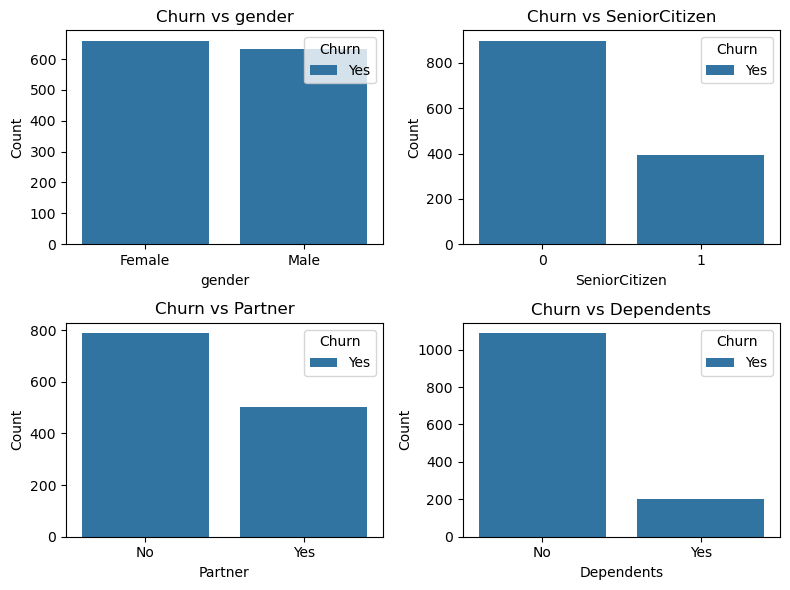

In [33]:
fiber_churn = df[(df['InternetService']=='Fiber optic') & (df['Churn'] == 'Yes')]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for k, ax in enumerate(axes.flat):
    if k < len(cols):
        sns.countplot(data=fiber_churn, x=cols[k], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[k]}')
        ax.set_xlabel(cols[k])
        ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

The same conclusion applies for the customers that have churned and have fiber optic.

<a id="2.3"></a>
# <b>2.3 <span style='color:#00008B'>Security_support</span></b>


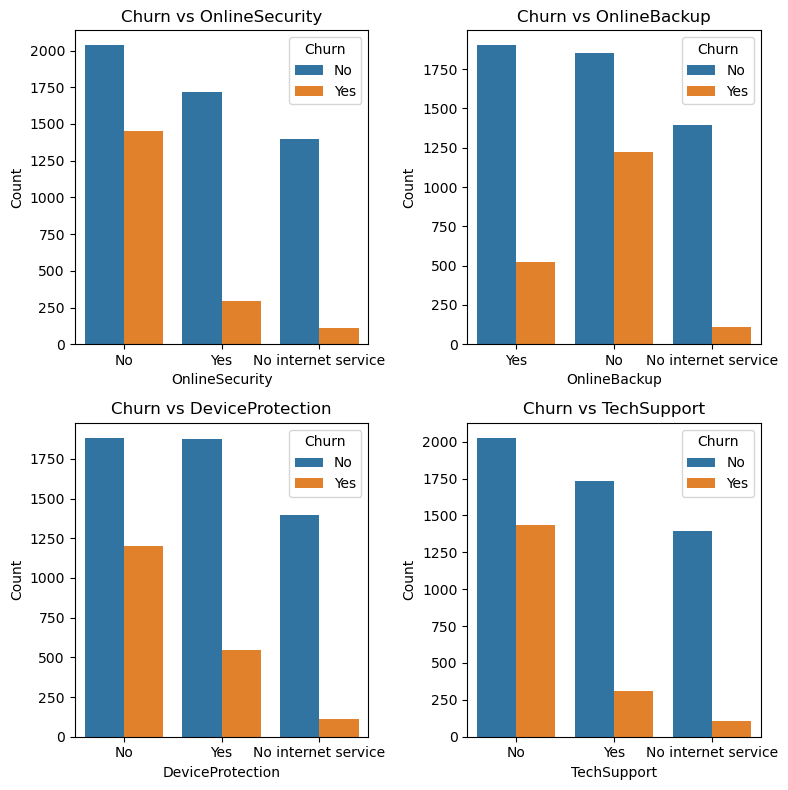

In [34]:
security_support = df[['Churn', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport']]
cols = security_support.columns[1:]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=security_support, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

<a id="2.4"></a>
# <b>2.4 <span style='color:#00008B'>Contract type</span></b>


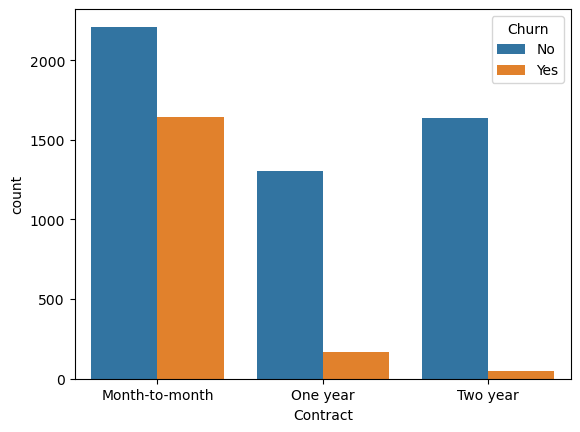

In [36]:
sns.countplot(data=df, x=df['Contract'], hue='Churn')
plt.show()

Customers with **Month-to-month contracts** tend to **churn significantly more** often then customers with one year and two year contracts

<a id="2.5"></a>
# <b>2.5 <span style='color:#00008B'>Churn analysis based on paying options</span></b>
 

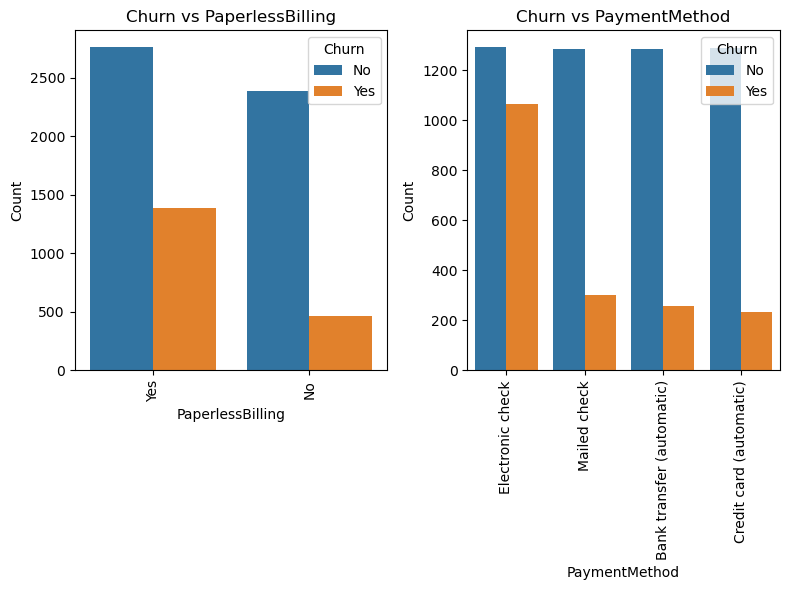

In [37]:
paying_options = df[['Churn', 'PaperlessBilling', 'PaymentMethod']]
cols = paying_options.columns[1:]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,6))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=paying_options, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


<a id="2.6"></a>
# <b>2.6 <span style='color:#00008B'>Churn analysis based on tenure group</span></b>


Customers with **paperless billing and electronic checks** are more likely to **churn** than customers without paperless billing and than the customers with other payment methods.

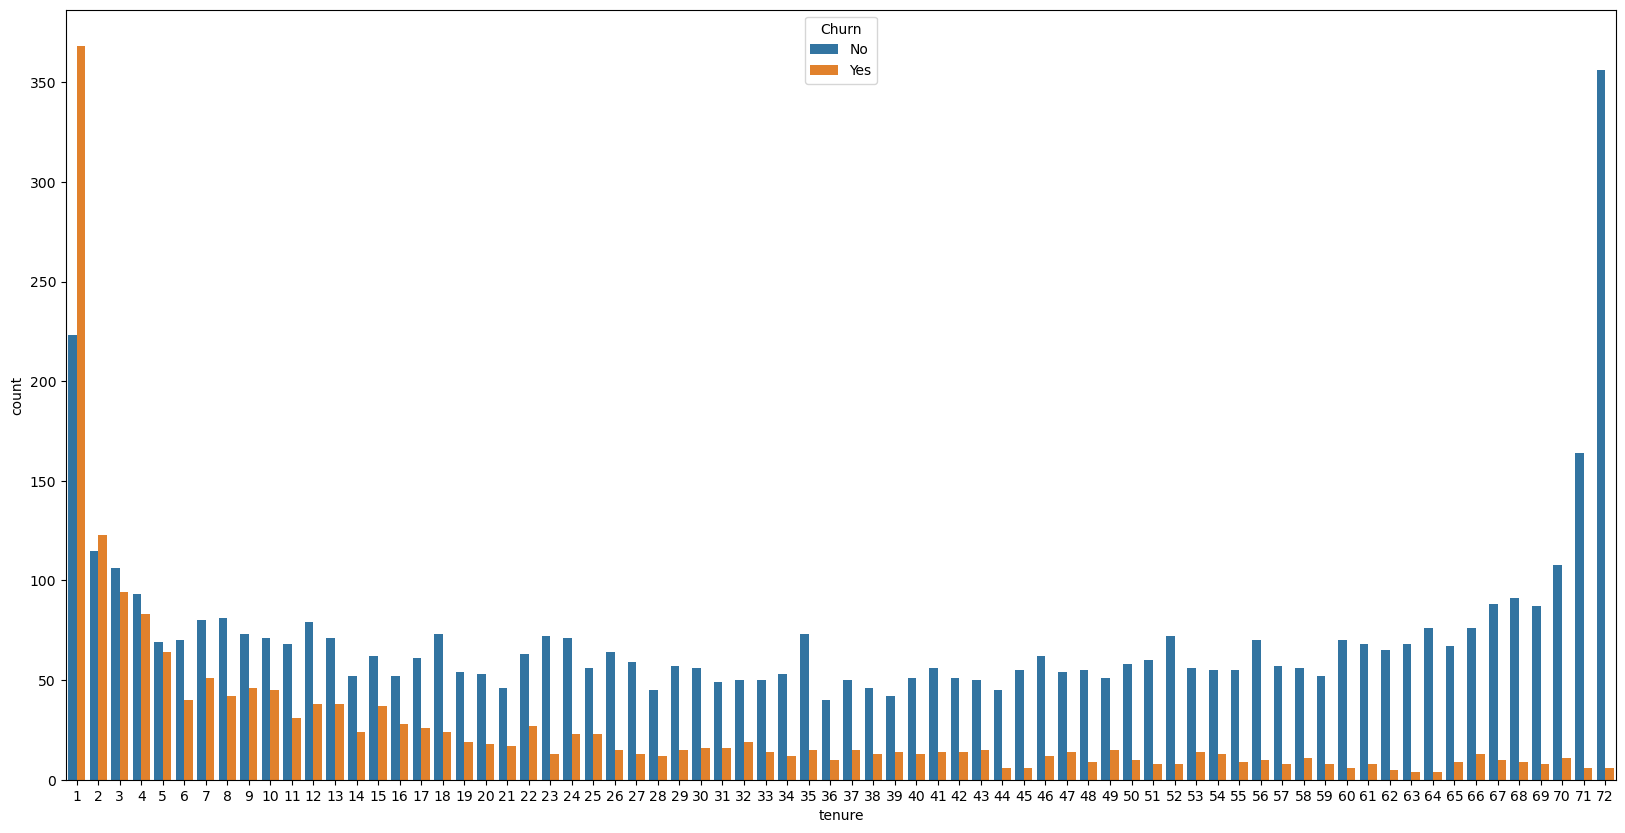

In [38]:
plt.figure(figsize=(20, 10))
sns.countplot(data = df, x = 'tenure', hue = 'Churn')
plt.show()

Customers who **spent less than 1 year** using our services tend to **churn substantially more** than the customers of other tenure groups.

As the **tenure increases**, the **churn rate decreases**

<a id="2.7"></a>
# <b>2.7 <span style='color:#00008B'>Charges</span></b>

In [41]:
df[df['TotalCharges']<0]

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

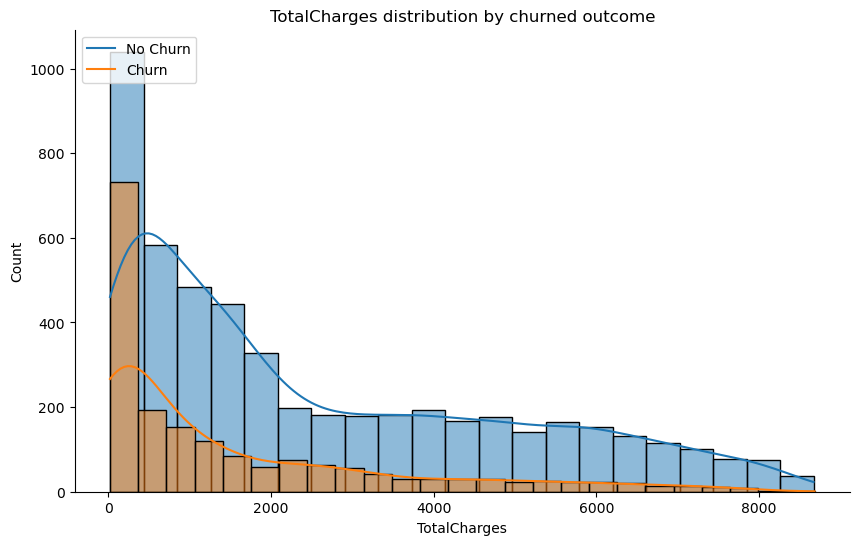

In [43]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.histplot(df['TotalCharges'][df['Churn']=='No'], label='Churn - No', kde=True)
sns.histplot(df['TotalCharges'][df['Churn']=='Yes'], label='Churn - Yes', kde = True)
ax.legend(["No Churn","Churn"],loc='upper left')
ax.set_xlabel('TotalCharges')
ax.set_title('TotalCharges distribution by churned outcome')
sns.despine()
plt.show()

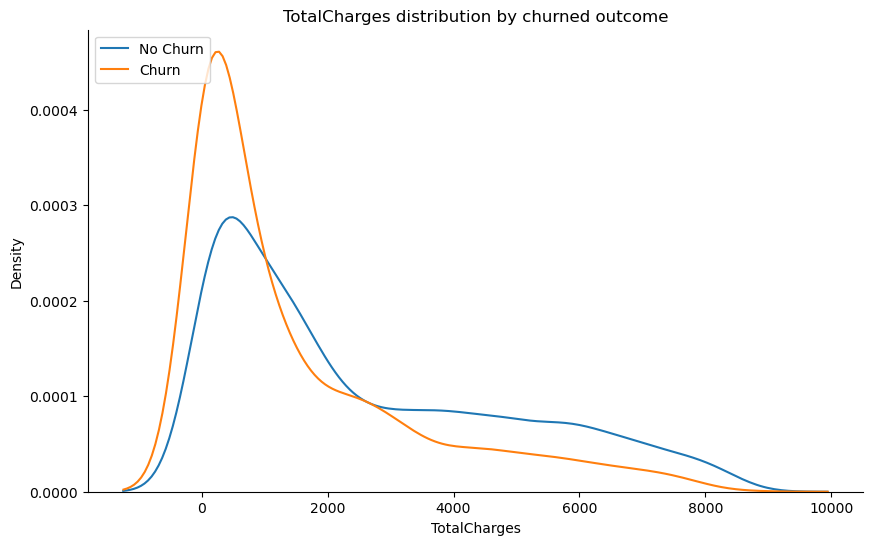

In [39]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.kdeplot(df['TotalCharges'][df['Churn']=='No'], label='Churn - No')
sns.kdeplot(df['TotalCharges'][df['Churn']=='Yes'], label='Churn - Yes')
ax.legend(["No Churn","Churn"],loc='upper left')
ax.set_xlabel('TotalCharges')
ax.set_title('TotalCharges distribution by churned outcome')
sns.despine()
plt.show()

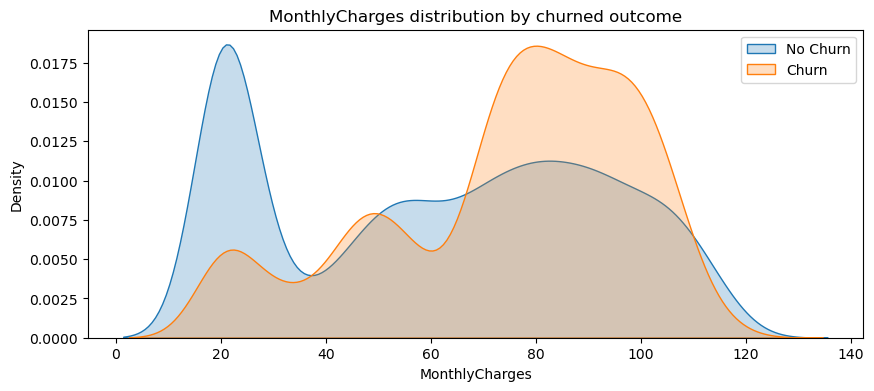

In [46]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.kdeplot(df['MonthlyCharges'][df['Churn']=='No'], label='Churn - No', shade = True)
sns.kdeplot(df['MonthlyCharges'][df['Churn']=='Yes'], label='Churn - Yes', shade = True)
ax.legend(["No Churn","Churn"],loc='upper right')
ax.set_xlabel('MonthlyCharges')
ax.set_title('MonthlyCharges distribution by churned outcome')
plt.show()

In [47]:
df.groupby(['Churn'])[['MonthlyCharges','TotalCharges' ]].describe()

MonthlyCharges                                                           \
               count       mean        std    min   25%    50%    75%     max   
Churn                                                                           
No            5153.0  61.387415  31.071570  18.25  25.1  64.55  88.55  118.75   
Yes           1857.0  74.604308  24.597504  18.85  56.5  79.70  94.25  118.35   

      TotalCharges                                                           \
             count         mean          std    min     25%     50%     75%   
Churn                                                                         
No          5153.0  2560.264118  2329.034632  18.80  581.85  1688.9  4265.0   
Yes         1857.0  1541.376548  1893.151020  18.85  140.70   713.1  2345.2   

                
           max  
Churn           
No     8672.45  
Yes    8684.80

In [48]:
# churn_monthly = pd.Series([df[df['Churn'] == 'Yes']['MonthlyCharges'].mean(),
#                            df[df['Churn'] == 'No']['MonthlyCharges'].mean()],
#                           index=['Churned', 'Non-Churned'])
# churn_total = pd.Series([df[df['Churn'] == 'Yes']['TotalCharges'].mean(),
#                        df[df['Churn'] == 'No']['TotalCharges'].mean()],
#                        index = ['Churned', 'Non-Churned'])
# print(churn_monthly)
# print(churn_total)

<!-- <a id="3"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">3 <span style='color:#CDA63A'>|</span>Data Visualization</div>
 -->

1. **High Churn rate** is seen for the customers **without dependants, online security, tech support**. Also customers who use **electronic checks** as a payment method, who use **our services less than 1 year** and who have **month-to-month contracts** are likely to churn frequently. 
Factors that also contribute to the high churn rate (although their impact is  less significant then the aforementioned variables) are:
Non-seniority, no partners, no phone service, no online backup, no device protection and paperless billing.

2. **Low Churn rate** is seen for the customers that **use our services more than 4 years**, that have **one-year / two-years contracts** and for the customers **without internet service, streamingTV and streamingMovies**.


3. Almost **no impact on churn** have the variables such as **gender, streamingTV, streamingMovies and MultipleLines**


<a id="4"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">4 <span style='color:#CDA63A'>|</span>Data preprocessing and Feature engineering</div>


##### the columns have no internet service or no phone service, that can be replaced with a simple No

### Feature enigeering
- Feature selection, 
- Feature tranfromation: one hot enconding (dummies variable), 
- two hot encoding(Yes:1 , no:0), order :0, 1, 2, 3, 4, 5,
- Feature extraction,
  

In [104]:
df.replace({'No internet service':'No', 'No phone service':'No'},inplace=True )

In [105]:
df

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0               No             DSL             No          Yes   
1               No             DSL            Yes           No   
2               No             DSL            Yes          Yes   
3               No             DSL            Yes           No   
4               No     Fiber optic             No           No   
...            ...             ...            ...          ...   
7038           Yes             DSL            Yes           No   
7039           Yes     Fiber optic             No          Yes   
7040            No             DSL            Yes           No   
7041           Yes     Fiber optic             No           No   
7042            No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7010 rows x 20 columns]

In [106]:

list(df.columns)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [107]:
len(df['Churn'].unique())

2

In [108]:
yes_no_columns = []
numeric_columns = []
categorical_columns = []
columns = list(df.columns)
for i in columns:
    if len(df[i].unique()) == 2:
        yes_no_columns.append(i)
    elif len(df[i].unique()) >= 10:
        numeric_columns.append(i)
    else:
        categorical_columns.append(i)

In [109]:
categorical_columns

['InternetService', 'Contract', 'PaymentMethod']

In [110]:
numeric_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [111]:
yes_no_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [112]:
df2 = df.copy()

In [113]:
df2

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0               No             DSL             No          Yes   
1               No             DSL            Yes           No   
2               No             DSL            Yes          Yes   
3               No             DSL            Yes           No   
4               No     Fiber optic             No           No   
...            ...             ...            ...          ...   
7038           Yes             DSL            Yes           No   
7039           Yes     Fiber optic             No          Yes   
7040            No             DSL            Yes           No   
7041           Yes     Fiber optic             No           No   
7042            No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7010 rows x 20 columns]

In [114]:
df2['OnlineSecurity'].value_counts()

OnlineSecurity
No     4995
Yes    2015
Name: count, dtype: int64

In [115]:
df2[df2['OnlineSecurity']=='No internet service']

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

In [117]:
df2

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      34             1   
2          0              0        0           0       2             1   
3          0              0        0           0      45             0   
4          1              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        1           1      24             1   
7039       1              0        1           1      72             1   
7040       1              0        1           1      11             0   
7041       0              1        1           0       4             1   
7042       0              0        0           0      66             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0                 0             DSL               0             1   
1                 0             DSL               1             0   
2                 0             DSL               1             1   
3                 0             DSL               1             0   
4                 0     Fiber optic               0             0   
...             ...             ...             ...           ...   
7038              1             DSL               1             0   
7039              1     Fiber optic               0             1   
7040              0             DSL               1             0   
7041              1     Fiber optic               0             0   
7042              0     Fiber optic               1             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                    0            0            0                0   
1                    1            0            0                0   
2                    0            0            0                0   
3                    1            1            0                0   
4                    0            0            0                0   
...                ...          ...          ...              ...   
7038                 1            1            1                1   
7039                 1            0            1                1   
7040                 0            0            0                0   
7041                 0            0            0                0   
7042                 1            1            1                1   

            Contract  PaperlessBilling              PaymentMethod  \
0     Month-to-month                 1           Electronic check   
1           One year                 0               Mailed check   
2     Month-to-month                 1               Mailed check   
3           One year                 0  Bank transfer (automatic)   
4     Month-to-month                 1           Electronic check   
...              ...               ...                        ...   
7038        One year                 1               Mailed check   
7039        One year                 1    Credit card (automatic)   
7040  Month-to-month                 1           Electronic check   
7041  Month-to-month                 1               Mailed check   
7042        Two year                 1  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges  Churn  
0              29.85         29.85      0  
1              56.95       1889.50      0  
2              53.85        108.15      1  
3              42.30       1840.75      0  
4              70.70        151.65      1  
...              ...           ...    ...  
7038           84.80       1990.50      0  
7039          103.20       7362.90      0  
7040           29.60        346.45      0  
7041           74.40        306.60      1  
7042          105.65       6844.50      0  

[7010 rows x 20 columns]

In [118]:
df2['InternetService'].value_counts()

InternetService
Fiber optic    3090
DSL            2414
No             1506
Name: count, dtype: int64

In [119]:
df2[categorical_columns]

InternetService        Contract              PaymentMethod
0                DSL  Month-to-month           Electronic check
1                DSL        One year               Mailed check
2                DSL  Month-to-month               Mailed check
3                DSL        One year  Bank transfer (automatic)
4        Fiber optic  Month-to-month           Electronic check
...              ...             ...                        ...
7038             DSL        One year               Mailed check
7039     Fiber optic        One year    Credit card (automatic)
7040             DSL  Month-to-month           Electronic check
7041     Fiber optic  Month-to-month               Mailed check
7042     Fiber optic        Two year  Bank transfer (automatic)

[7010 rows x 3 columns]

In [120]:
df2['Contract'].value_counts()

Contract
Month-to-month    3853
Two year          1685
One year          1472
Name: count, dtype: int64

In [121]:
df3 = df2.copy()

In [122]:
df4 = df2.copy()

In [123]:
df3.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0              0             DSL               0             1   
1              0             DSL               1             0   
2              0             DSL               1             1   
3              0             DSL               1             0   
4              0     Fiber optic               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 1            0            0                0   
2                 0            0            0                0   
3                 1            1            0                0   
4                 0            0            0                0   

         Contract  PaperlessBilling              PaymentMethod  \
0  Month-to-month                 1           Electronic check   
1        One year                 0               Mailed check   
2  Month-to-month                 1               Mailed check   
3        One year                 0  Bank transfer (automatic)   
4  Month-to-month                 1           Electronic check   

   MonthlyCharges  TotalCharges  Churn  
0           29.85         29.85      0  
1           56.95       1889.50      0  
2           53.85        108.15      1  
3           42.30       1840.75      0  
4           70.70        151.65      1

In [96]:
# df4[categorical_columns].

In [ ]:
### drop columns gender

In [130]:
df3.drop(columns='gender', inplace=True)

In [ ]:
# df['PhoneService']

In [131]:
df3

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
0                 0        1           0       1             0              0   
1                 0        0           0      34             1              0   
2                 0        0           0       2             1              0   
3                 0        0           0      45             0              0   
4                 0        0           0       2             1              0   
...             ...      ...         ...     ...           ...            ...   
7038              0        1           1      24             1              1   
7039              0        1           1      72             1              1   
7040              0        1           1      11             0              0   
7041              1        1           0       4             1              1   
7042              0        0           0      66             1              0   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0                  0             1                 0            0   
1                  1             0                 1            0   
2                  1             1                 0            0   
3                  1             0                 1            1   
4                  0             0                 0            0   
...              ...           ...               ...          ...   
7038               1             0                 1            1   
7039               0             1                 1            0   
7040               1             0                 0            0   
7041               0             0                 0            0   
7042               1             0                 1            1   

      StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0               0                0         1                 1   
1               0                0         2                 0   
2               0                0         1                 1   
3               0                0         2                 0   
4               0                0         1                 1   
...           ...              ...       ...               ...   
7038            1                1         2                 1   
7039            1                1         2                 1   
7040            0                0         1                 1   
7041            0                0         1                 1   
7042            1                1         3                 1   

      MonthlyCharges  TotalCharges  Churn  InternetService_DSL  \
0              29.85         29.85      0                 True   
1              56.95       1889.50      0                 True   
2              53.85        108.15      1                 True   
3              42.30       1840.75      0                 True   
4              70.70        151.65      1                False   
...              ...           ...    ...                  ...   
7038           84.80       1990.50      0                 True   
7039          103.20       7362.90      0                False   
7040           29.60        346.45      0                 True   
7041           74.40        306.60      1                False   
7042          105.65       6844.50      0                False   

      InternetService_Fiber optic  InternetService_No  \
0                           False               False   
1                           False               False   
2                           False               False   
3                           False               False   
4                            True               False   
...                           ...                 ...   
7038                        False               False   
7039                         True               False   
7040                        False               False   
7041                         True               

In [132]:
df3.replace({False:0, True:1}, inplace=True)

<a id="4.1"></a>
# <b>4.1 <span style='color:#00008B'>Scaling</span></b>
**feature scaling** is not required for logistic regression


<a id="4.2"></a>
# <b>4.2 <span style='color:#00008B'>Encoding Categorical Variables</span></b>


We will use **One-Hot Encoding** and **Label Encoding**

<a id="4.2.1"></a>
## <b>4.2.1 <span style='color:#00008B'>Label Encoding or two Hot encoding</span></b>

In [ ]:
df3 = pd.get_dummies(data = df3, columns=['InternetService','PaymentMethod' ])

In [124]:
df3['Contract'].replace({'Month-to-month':1, 'Two year':3,'One year':2 }, inplace=True)

<a id="4.2.2"></a>
## <b>4.2.2 <span style='color:#00008B'>One-Hot Encoding</span></b>


In [ ]:
df3 = pd.get_dummies(data = df3, columns=['InternetService','PaymentMethod' ])

<a id="4.2.2"></a>
## <b>4.2.2 <span style='color:#00008B'>Multicollinearity</span></b>

In [134]:
df[numeric_columns].corr()

tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.244194      0.825293
MonthlyCharges  0.244194        1.000000      0.650540
TotalCharges    0.825293        0.650540      1.000000

### Detecting Multicollinearity

A statistical technique called the **variance inflation factor (VIF)** can detect and measure the amount of collinearity in a multiple regression model.
- A VIF of 1 will mean that the variables are not correlated.
- A VIF between 1 and 5 shows that variables are moderately correlated.
- A VIF between 5 and 10 will mean that variables are highly correlated.


[More about Multicollinearity](https://www.investopedia.com/terms/m/multicollinearity.asp#:~:text=Multicollinearity%20is%20a%20statistical%20concept,in%20less%20reliable%20statistical%20inferences.)

In [135]:
def VIF(x):
    vif = pd.DataFrame({
        'Features': x.columns,
        'VIF': [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    })
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif

In [136]:
numeric_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [138]:
VIF(df3[numeric_columns])

Features   VIF
0    TotalCharges  8.09
1          tenure  6.33
2  MonthlyCharges  3.37

In [139]:
df3 = df3.drop(columns = 'TotalCharges')

In [141]:
VIF(df3[['tenure', 'MonthlyCharges']])

Features   VIF
0          tenure  2.62
1  MonthlyCharges  2.62

In [142]:
dataset =df3.copy()

In [143]:
dataset

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
0                 0        1           0       1             0              0   
1                 0        0           0      34             1              0   
2                 0        0           0       2             1              0   
3                 0        0           0      45             0              0   
4                 0        0           0       2             1              0   
...             ...      ...         ...     ...           ...            ...   
7038              0        1           1      24             1              1   
7039              0        1           1      72             1              1   
7040              0        1           1      11             0              0   
7041              1        1           0       4             1              1   
7042              0        0           0      66             1              0   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0                  0             1                 0            0   
1                  1             0                 1            0   
2                  1             1                 0            0   
3                  1             0                 1            1   
4                  0             0                 0            0   
...              ...           ...               ...          ...   
7038               1             0                 1            1   
7039               0             1                 1            0   
7040               1             0                 0            0   
7041               0             0                 0            0   
7042               1             0                 1            1   

      StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0               0                0         1                 1   
1               0                0         2                 0   
2               0                0         1                 1   
3               0                0         2                 0   
4               0                0         1                 1   
...           ...              ...       ...               ...   
7038            1                1         2                 1   
7039            1                1         2                 1   
7040            0                0         1                 1   
7041            0                0         1                 1   
7042            1                1         3                 1   

      MonthlyCharges  Churn  InternetService_DSL  InternetService_Fiber optic  \
0              29.85      0                    1                            0   
1              56.95      0                    1                            0   
2              53.85      1                    1                            0   
3              42.30      0                    1                            0   
4              70.70      1                    0                            1   
...              ...    ...                  ...                          ...   
7038           84.80      0                    1                            0   
7039          103.20      0                    0                            1   
7040           29.60      0                    1                            0   
7041           74.40      1                    0                            1   
7042          105.65      0                    0                            1   

      InternetService_No  PaymentMethod_Bank transfer (automatic)  \
0                      0                                        0   
1                      0                                        0   
2                      0                                        0   
3                      0                                        1   
4                      0                                        0   
...                  ...

<a id="5"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">4 <span style='color:#CDA63A'>|</span>Data Splitting and Model Building</div>

<a id="5.1"></a>
# <b>4.1 <span style='color:#00008B'>Data Splitting Or Cross Validation</span></b>


**splitting** our dataset into training and testing sets to avoid bias in your model.<br>
**Overfitting**

In [144]:
X = dataset.drop(columns='Churn')
y = dataset['Churn']

In [145]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7010, dtype: int64

In [146]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [147]:
x_train

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
1251              0        0           0       1             1              0   
676               0        0           0      48             1              1   
381               0        0           0       1             1              0   
2313              0        1           1      43             1              1   
6901              0        0           0      30             1              1   
...             ...      ...         ...     ...           ...            ...   
4950              0        1           0       4             1              1   
3276              0        0           0       4             1              0   
1661              1        1           0      65             1              1   
2617              0        0           0       1             1              0   
2743              0        1           0      67             1              0   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
1251               0             1                 0            0   
676                0             0                 0            0   
381                0             1                 0            0   
2313               0             0                 1            1   
6901               0             1                 1            0   
...              ...           ...               ...          ...   
4950               0             1                 0            0   
3276               0             0                 0            0   
1661               0             1                 1            0   
2617               0             0                 0            0   
2743               1             1                 1            1   

      StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
1251            0                0         1                 0   
676             0                0         2                 0   
381             0                0         1                 0   
2313            1                1         2                 1   
6901            1                0         2                 1   
...           ...              ...       ...               ...   
4950            1                0         1                 1   
3276            0                1         1                 1   
1661            1                1         1                 1   
2617            0                0         1                 1   
2743            1                1         3                 1   

      MonthlyCharges  InternetService_DSL  InternetService_Fiber optic  \
1251           75.80                    0                            1   
676            24.55                    0                            0   
381            50.65                    1                            0   
2313          104.30                    0                            1   
6901           68.95                    1                            0   
...              ...                  ...                          ...   
4950           91.65                    0                            1   
3276           79.15                    0                            1   
1661          108.80                    0                            1   
2617           19.60                    0                            0   
2743          111.05                    0                            1   

      InternetService_No  PaymentMethod_Bank transfer (automatic)  \
1251                   0                                        0   
676                    1                                        1   
381                    0                                        0   
2313                   0                                        0   
6901                   0                                        0   
...                  ...                                      ...   
4950                   0               

<a id="5.2"></a>
# <b>5.2 <span style='color:#00008B'>Model Buiding and Model Evaluation</span></b>

**LogisticRegression**
<img src="Photos/Logistics.png" alt="Logistics" width="50%" style="display: block; margin: 0 auto;">
<img src="Photos/Sigmoid_function.png" alt="Logistics" width="50%" style="display: block; margin: 0 auto;">

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
Logistic = LogisticRegression()

In [150]:
Logistic.fit(x_train, y_train)

LogisticRegression()

In [151]:
y_pred = Logistic.predict(x_test)

In [154]:
error = y_pred-y_test

In [155]:
error.describe()

count    1402.000000
mean       -0.038516
std         0.430726
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Churn, dtype: float64

In [161]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [164]:
(tn+tp)/(tn+ fp+fn+tp)

0.8131241084165478

In [ ]:
tn + tp + fp+fn

In [157]:
x_test

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
3719              0        0           0      28             1              0   
2645              0        0           0       1             1              0   
2945              0        0           0       9             1              0   
2706              0        1           0       2             1              0   
1902              0        1           1      72             1              1   
...             ...      ...         ...     ...           ...            ...   
5581              0        1           1      68             1              1   
3026              0        1           0      16             1              1   
5937              1        1           0       8             1              1   
2435              0        0           1      14             1              0   
3031              1        1           0      50             1              0   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
3719               0             0                 0            0   
2645               0             0                 0            0   
2945               1             0                 0            0   
2706               0             0                 1            0   
1902               1             1                 1            1   
...              ...           ...               ...          ...   
5581               1             1                 1            1   
3026               0             0                 0            0   
5937               0             0                 0            0   
2435               0             0                 1            0   
3031               0             0                 0            0   

      StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
3719            0                0         2                 0   
2645            0                0         1                 0   
2945            0                0         1                 0   
2706            0                0         1                 0   
1902            1                1         3                 1   
...           ...              ...       ...               ...   
5581            1                1         3                 1   
3026            1                0         1                 1   
5937            0                1         1                 1   
2435            1                0         1                 1   
3031            0                0         1                 1   

      MonthlyCharges  InternetService_DSL  InternetService_Fiber optic  \
3719           18.25                    0                            0   
2645           19.80                    0                            0   
2945           75.60                    0                            1   
2706           76.40                    0                            1   
1902           90.60                    1                            0   
...              ...                  ...                          ...   
5581          113.15                    0                            1   
3026           84.95                    0                            1   
5937           84.00                    0                            1   
2435           59.80                    1                            0   
3031           71.05                    0                            1   

      InternetService_No  PaymentMethod_Bank transfer (automatic)  \
3719                   1                                        0   
2645                   1                                        0   
2945                   0                                        0   
2706                   0                                        0   
1902                   0                                        0   
...                  ...                                      ...   
5581                   0               

In [159]:
y_test.value_counts()

Churn
0    1030
1     372
Name: count, dtype: int64

In [ ]:
negative : 0, Positive :1
True negative : 0 correct
True Positive : 1 correct

<img src="Photos/confusion_matrix.webp" alt="Logistics" width="50%" style="display: block; margin: 0 auto;">

In [169]:
y_test.value_counts()

Churn
0    1030
1     372
Name: count, dtype: int64

In [168]:
confusion_matrix(y_test, y_pred)

array([[926, 104],
       [158, 214]])

In [165]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    error = 1-accuracy
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    result={"Accuracy":accuracy,"Error":error, "Precision":precision,"Recall":recall,'Specificity':specificity}
    return result

In [167]:
1-(tn+tp)/(tn+ fp+fn+tp)

0.1868758915834522

In [166]:
model_eval(y_test, y_pred)

{'Accuracy': 0.8131241084165478,
 'Error': 0.1868758915834522,
 'Precision': 0.6729559748427673,
 'Recall': 0.5752688172043011,
 'Specificity': 0.8990291262135922}

<img src="Photos/confusion_matrix.webp" alt="Logistics" width="50%" style="display: block; margin: 0 auto;">

In [ ]:
x_train2 , x_test2, y_train2, y_test2 = train_test_split(X_1, Y_1, test_size= 0.2)

In [ ]:
Logistic2 = LogisticRegression()

In [ ]:
Logistic2.fit(x_train2, y_train2)

In [ ]:
y_pred2 = Logistic2.predict(x_test2)

In [ ]:
model_eval(y_test2, y_pred2)

<a id="5.2.1"></a>
## <b>5.2.1 <span style='color:#00008B'>Feature selection</span></b>


<a id="5.2.1.1"></a>
### <b>5.2.1.1 <span style='color:#00008B'>Recursive Feature Elimination (RFE)</span></b>

[More about RFE](https://www.analyticsvidhya.com/blog/2023/05/recursive-feature-elimination/#:~:text=Recursive%20Feature%20Elimination%20is%20a,number%20of%20features%20is%20obtained.)
```python
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Initialize RFE with desired number of features
n_features = 10
rfe = RFE(estimator=model, n_features_to_select=n_features)

# Fit RFE on the training data
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Get selected feature indices
selected_feature_indices = rfe.support_
selected_features = X.columns[selected_feature_indices]

```


## Model building using RFE
 
---
**Recursive Feature Elimination** offers a compelling solution, and RFE iteratively removes less important features, creating a subset that maximizes predictive accuracy.

**Recursive Feature Elimination** algorithm works in the following steps:
1. Rank the importance of all features using the chosen RFE machine learning algorithm.
2. Obtain feature importance
3. Eliminate the least important feature(s).
4. Build a model using the remaining features.


<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2023/05/image-17.png" alt="Logistics" width="50%" style="display: block; margin: 0 auto;">


In [ ]:
n = int(input('Input the number of features you want to predict: '))

rfe = RFE(Logistic2, n_features_to_select= n)
rfe.fit(x_train, y_train)

In [ ]:
len(x_train2.columns)

In [ ]:
rfe.support_

In [ ]:

selected_features = x_train[x_train.columns[rfe.support_]]

In [ ]:
selected_features

In [ ]:
# selected_features

In [ ]:
Logistic3 = LogisticRegression()

In [ ]:
# 

In [ ]:
# x_train = x_train[selected_features]

In [ ]:
Logistic3.fit(selected_features, y_train)

In [ ]:
selected_features.columns

In [ ]:
x_test2[selected_features.columns]

In [ ]:
y_pred3 = Logistic3.predict(x_test2[selected_features.columns])

In [ ]:
len(y_pred3)

In [ ]:
model_eval(y_test2, y_pred3)

In [ ]:
x_test2[selected_features.columns]

In [ ]:
Logistic3.coef_

In [ ]:
coefficients1 = Logistic3.coef_
coefficients1

In [ ]:
coefficients1 = coefficients1[0].tolist()

In [ ]:
feature_names=selected_features.columns.tolist()

In [ ]:
final_featureimportance = pd.DataFrame({'Coefficient':coefficients1,
                          'feature_names1':feature_names})
final_featureimportance

In [ ]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
sns.countplot(x = data['Contract'], hue = data['Churn'])

In [ ]:
sns.countplot(x = data['InternetService'], hue = data['Churn'])

In [ ]:
final_featureimportance.sort_values(by = 'Coefficient', ascending=False)

In [ ]:
from explainerdashboard import ClassifierExplainer , ExplainerDashboard

In [ ]:
explainer = ClassifierExplainer(Logistic3, selected_features, y_train)
ExplainerDashboard(explainer, port=433).run()